In [ ]:

import pandas as pd

# Read in the data
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

save_path = 'C:\\Users\\aoife\Documents\\Project\\'

# Read in merged file
df = pd.read_csv(folder_path + 'concatenated_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score'])

print(df.head(5))

In [ ]:
# Train test split

from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=10)

In [ ]:
# X - features

X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration']].values

# y - target
y = df['ssq_score'].values

groups = df['participantId'].values

In [ ]:
# import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the Random Forest Regressor model
model = LinearRegression()

# Lists to store evaluation metrics
train_scores = []
test_scores = []
train_predicted_vals = []
train_actual_vals = []
test_predicted_vals = []
test_actual_vals = []

In [ ]:
# Train model

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    train_scores.append(train_rmse)

    # Evaluate on test data

    test_pred = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    test_scores.append(test_rmse)

    # Predicted and actual values
    train_predicted_vals.extend(train_pred)
    train_actual_vals.extend(y_train)
    test_predicted_vals.extend(test_pred)
    test_actual_vals.extend(y_test)

# Average scores
avg_train_mse = sum(train_scores)/len(train_scores)
avg_test_mse = sum(test_scores)/len(test_scores)

print("Average Train RMSE:", avg_train_mse)
print("Average Test RMSE: ", avg_test_mse)
    

(0.8, 10.837040263210945)


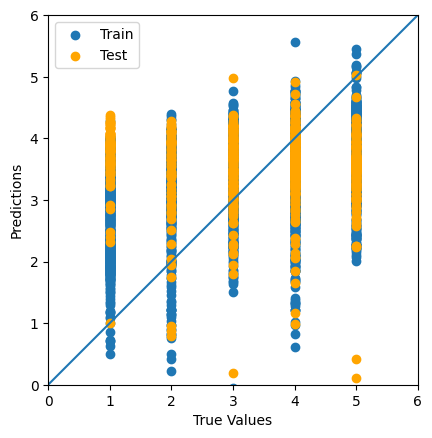

In [28]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
print(plt.xlim())
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


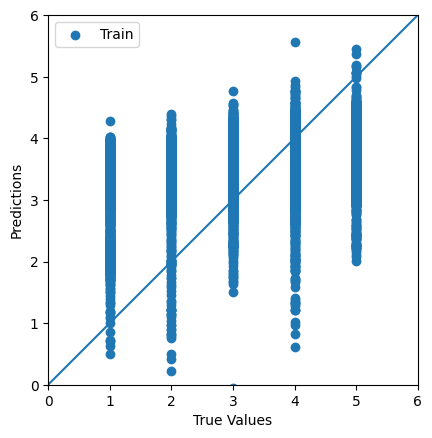

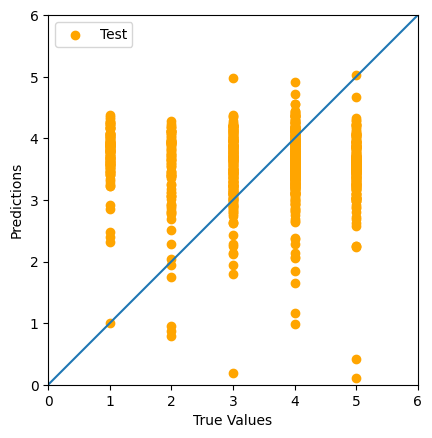

In [29]:
# Separate plots

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()
